In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np

In [3]:
columns_to_keep = ['Year', 'Region', 'Domestic_mean_consumption_KWh_per_meter']

In [4]:
Smart_Metres_mean_consumption = pd.read_csv('elec_region_stacked_2005-2023.csv')

In [5]:
missing_columns = [col for col in columns_to_keep if col not in Smart_Metres_mean_consumption.columns]
if missing_columns:
    raise ValueError(f"Missing columns in CSV: {missing_columns}")
else:
    filtered_Smart_Metres_mean_consumption = Smart_Metres_mean_consumption[
        Smart_Metres_mean_consumption['Region'].isin(['Great Britain', 'Great Britain (inc unallocated)'])
    ][columns_to_keep]

In [6]:
print(filtered_Smart_Metres_mean_consumption.tail())

     Year                           Region  \
216  2019  Great Britain (inc unallocated)   
235  2020  Great Britain (inc unallocated)   
254  2021  Great Britain (inc unallocated)   
273  2022  Great Britain (inc unallocated)   
292  2023  Great Britain (inc unallocated)   

     Domestic_mean_consumption_KWh_per_meter  
216                              3628.292151  
235                              3800.057648  
254                              3555.710814  
273                              3239.487895  
292                              3300.877976  


In [7]:
X = filtered_Smart_Metres_mean_consumption[['Year']]
y = filtered_Smart_Metres_mean_consumption['Domestic_mean_consumption_KWh_per_meter']  # <-- 1-D

model = LinearRegression()
model.fit(X, y)

future_years = pd.DataFrame({'Year': np.arange(2024, 2031)})
future_years['Predicted_Domestic_mean_consumption_KWh_per_meter'] = model.predict(future_years[['Year']])

print(future_years)

   Year  Predicted_Domestic_mean_consumption_KWh_per_meter
0  2024                                        3307.626813
1  2025                                        3245.386950
2  2026                                        3183.147088
3  2027                                        3120.907226
4  2028                                        3058.667363
5  2029                                        2996.427501
6  2030                                        2934.187639


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


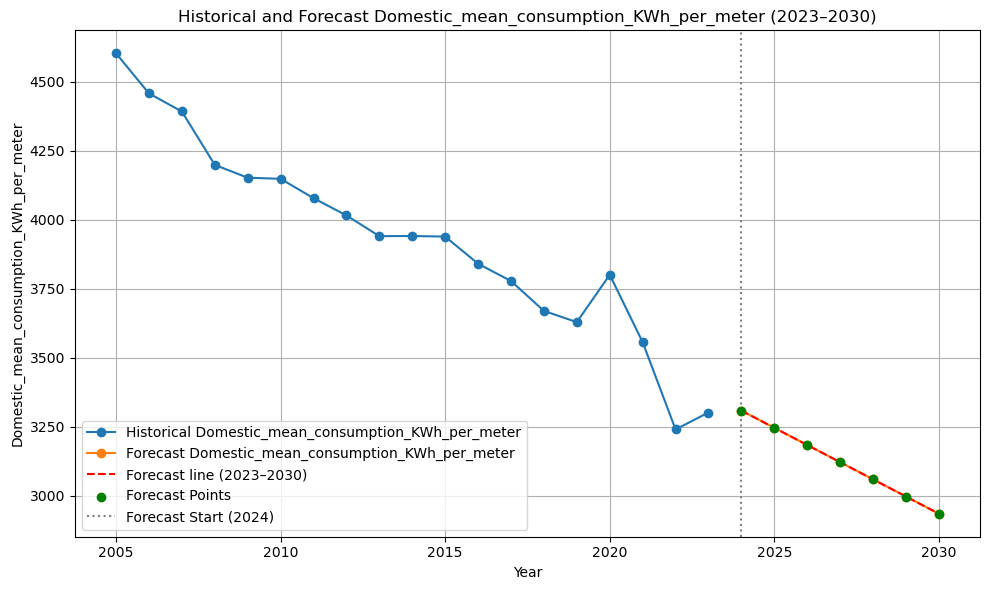

In [8]:
years_full = np.arange(future_years['Year'].min(), 2031)
predictions = model.predict(years_full.reshape(-1, 1))

plt.figure(figsize=(10, 6))

plt.plot(
    filtered_Smart_Metres_mean_consumption['Year'],
    filtered_Smart_Metres_mean_consumption['Domestic_mean_consumption_KWh_per_meter'],
    marker='o',
    label='Historical Domestic_mean_consumption_KWh_per_meter'
)

plt.plot(
    future_years['Year'],
    future_years['Predicted_Domestic_mean_consumption_KWh_per_meter'],
    marker='o',
    label='Forecast Domestic_mean_consumption_KWh_per_meter'
)
plt.plot(
    years_full, predictions,
    linestyle='--', color='red',
    label='Forecast line (2023–2030)'
)
plt.scatter(
    future_years['Year'],
    future_years['Predicted_Domestic_mean_consumption_KWh_per_meter'],
    color='green', zorder=5,
    label='Forecast Points'
)
plt.axvline(x=2024, color='gray', linestyle=':', label='Forecast Start (2024)')

plt.xlabel('Year')
plt.ylabel('Domestic_mean_consumption_KWh_per_meter')
plt.title('Historical and Forecast Domestic_mean_consumption_KWh_per_meter (2023–2030)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
historical_df = filtered_Smart_Metres_mean_consumption.rename(
    columns={"Domestic_mean_consumption_KWh_per_meter": "Actual_Domestic_mean_consumption_KWh_per_meter"}
)
forecast_df = future_years.rename(
    columns={"Predicted_Domestic_mean_consumption_KWh_per_meter": "Forecast_Domestic_mean_consumption_KWh_per_meter"}
)

combined_df = pd.merge(historical_df, forecast_df, on="Year", how="outer")

combined_df["Domestic_mean_consumption_KWh_per_meter"] = combined_df["Actual_Domestic_mean_consumption_KWh_per_meter"].combine_first(
    combined_df["Forecast_Domestic_mean_consumption_KWh_per_meter"]
)

combined_df = combined_df[["Year", "Domestic_mean_consumption_KWh_per_meter"]]

combined_df.to_csv("domestic_consumption_history_forecast.csv", index=False)
print("Saved combined data to domestic_consumption_history_forecast.csv")

Saved combined data to domestic_consumption_history_forecast.csv


In [10]:
Smart_Metres_mean_consumption_full = pd.read_csv("Smart Metre Stats - Table 1.csv", header=7)

print(Smart_Metres_mean_consumption_full.columns.tolist())

['Quarter', 'Gas meters\nsmart in\nsmart mode', 'Gas meters\nsmart in\ntraditional mode', 'Gas meters\ntotal smart meters', 'Gas meters\nnon-smart', 'Electricity \nmeters\nsmart in\nsmart \nmode', 'Electricity \nmeters\nsmart in\ntraditional mode', 'Electricity meters\ntotal smart meters', 'Electricity meters\nnon-smart', 'All meters\nsmart in\nsmart \nmode', 'All meters\nsmart in\ntraditional \nmode', 'All meters\ntotal smart meters', 'All meters\nnon-smart', 'Total', 'Notes']


In [11]:
Smart_Metres_mean_consumption_full_renamed= Smart_Metres_mean_consumption_full.rename(columns={
    'Quarter': 'Quarter',
    'Electricity \nmeters\nsmart in\nsmart \nmode': 'Smart in Smart Mode',
    'Electricity \nmeters\nsmart in\ntraditional mode': 'Smart in Traditional Mode',
    'Electricity meters\ntotal smart meters': 'Total Smart Meters',
    'Electricity meters\nnon-smart': 'Non-Smart Meters'
})

print(Smart_Metres_mean_consumption_full_renamed.head())

   Quarter Gas meters\nsmart in\nsmart mode  \
0  Q3 2012                              124   
1  Q4 2012                            1,461   
2  Q1 2013                           11,991   
3  Q2 2013                           39,337   
4  Q3 2013                           72,113   

  Gas meters\nsmart in\ntraditional mode Gas meters\ntotal smart meters  \
0                                    NaN                            124   
1                                    NaN                          1,461   
2                                    NaN                         11,991   
3                                    NaN                         39,337   
4                                    NaN                         72,113   

  Gas meters\nnon-smart Smart in Smart Mode Smart in Traditional Mode  \
0            21,387,053                 132                       NaN   
1            21,550,984               1,739                       NaN   
2            21,416,951              12,049    

In [12]:
Smart_Metres_Number_of_dwelings = Smart_Metres_mean_consumption_full_renamed[[
    'Quarter',
    'Smart in Smart Mode',
    'Smart in Traditional Mode',
    'Total Smart Meters',
    'Non-Smart Meters'
]].copy()

In [13]:
print(Smart_Metres_Number_of_dwelings.head())

   Quarter Smart in Smart Mode Smart in Traditional Mode Total Smart Meters  \
0  Q3 2012                 132                       NaN                132   
1  Q4 2012               1,739                       NaN              1,739   
2  Q1 2013              12,049                       NaN             12,049   
3  Q2 2013              50,038                       NaN             50,038   
4  Q3 2013             104,704                       NaN            104,704   

  Non-Smart Meters  
0       26,163,247  
1       26,174,965  
2       25,923,120  
3       25,751,659  
4       25,757,248  


In [14]:
Smart_Metres_Number_of_dwelings[['Quarter_Label', 'Year']] = Smart_Metres_Number_of_dwelings['Quarter'].str.split(" ", expand=True)

Smart_Metres_Number_of_dwelings['Year'] = Smart_Metres_Number_of_dwelings['Year'].astype(int)
Smart_Metres_Number_of_dwelings['Quarter_Num'] = Smart_Metres_Number_of_dwelings['Quarter_Label'].str.extract(r'(\d)').astype(int)

Smart_Metres_Number_of_dwelings_sorted = Smart_Metres_Number_of_dwelings.sort_values(by=['Year', 'Quarter_Num'])

Smart_Metres_Number_of_dwelings_sorted = Smart_Metres_Number_of_dwelings_sorted.drop(columns=['Quarter_Label', 'Quarter_Num'])

Smart_Metres_Number_of_dwelings_sorted['Quarter'] = Smart_Metres_Number_of_dwelings_sorted['Quarter'].str.split(" ").str[0]

cols = Smart_Metres_Number_of_dwelings_sorted.columns.tolist()
cols.insert(0, cols.pop(cols.index('Year')))
Smart_Metres_Number_of_dwelings_sorted = Smart_Metres_Number_of_dwelings_sorted[cols]

print(Smart_Metres_Number_of_dwelings_sorted.head())

   Year Quarter Smart in Smart Mode Smart in Traditional Mode  \
0  2012      Q3                 132                       NaN   
1  2012      Q4               1,739                       NaN   
2  2013      Q1              12,049                       NaN   
3  2013      Q2              50,038                       NaN   
4  2013      Q3             104,704                       NaN   

  Total Smart Meters Non-Smart Meters  
0                132       26,163,247  
1              1,739       26,174,965  
2             12,049       25,923,120  
3             50,038       25,751,659  
4            104,704       25,757,248  


In [15]:
Smart_Metres_Number_of_dwelings_sorted.dropna(inplace=True)

In [16]:
for col in ['Smart in Smart Mode', 'Smart in Traditional Mode', 'Total Smart Meters', 'Non-Smart Meters']:
    Smart_Metres_Number_of_dwelings_sorted[col] = (
        Smart_Metres_Number_of_dwelings_sorted[col]
        .astype(str)
        .str.replace(",", "")
        .astype(float)
    )

print(Smart_Metres_Number_of_dwelings_sorted)

    Year Quarter  Smart in Smart Mode  Smart in Traditional Mode  \
25  2018      Q4            7027058.0                   913408.0   
26  2019      Q1            7325328.0                  1150502.0   
27  2019      Q2            7654779.0                  1370965.0   
28  2019      Q3            8017974.0                  1653253.0   
29  2019      Q4            8431865.0                  1989202.0   
30  2020      Q1            8932589.0                  2028510.0   
31  2020      Q2            8953977.0                  2009973.0   
32  2020      Q3            9367496.0                  2022874.0   
33  2020      Q4            9884841.0                  2118166.0   
34  2021      Q1           10318212.0                  2040020.0   
35  2021      Q2           10838574.0                  2126942.0   
36  2021      Q3           11362116.0                  2184441.0   
37  2021      Q4           12688315.0                  2119559.0   
38  2022      Q1           13689569.0           

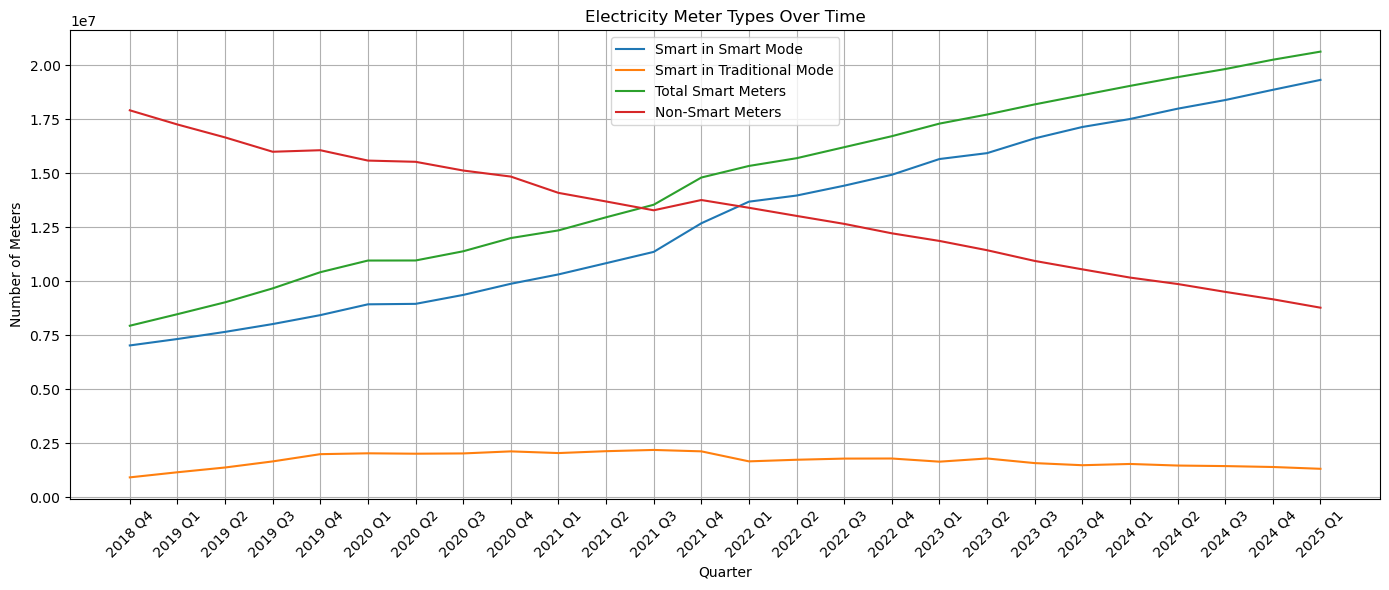

In [17]:
Smart_Metres_Number_of_dwelings_sorted['Year_Quarter'] = (
    Smart_Metres_Number_of_dwelings_sorted['Year'].astype(str) + " " + Smart_Metres_Number_of_dwelings_sorted['Quarter']
)

plt.figure(figsize=(14, 6))

for column in ['Smart in Smart Mode', 'Smart in Traditional Mode', 'Total Smart Meters', 'Non-Smart Meters']:
    plt.plot(Smart_Metres_Number_of_dwelings_sorted['Year_Quarter'], Smart_Metres_Number_of_dwelings_sorted[column], label=column)

plt.xlabel('Quarter')
plt.ylabel('Number of Meters')
plt.title('Electricity Meter Types Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

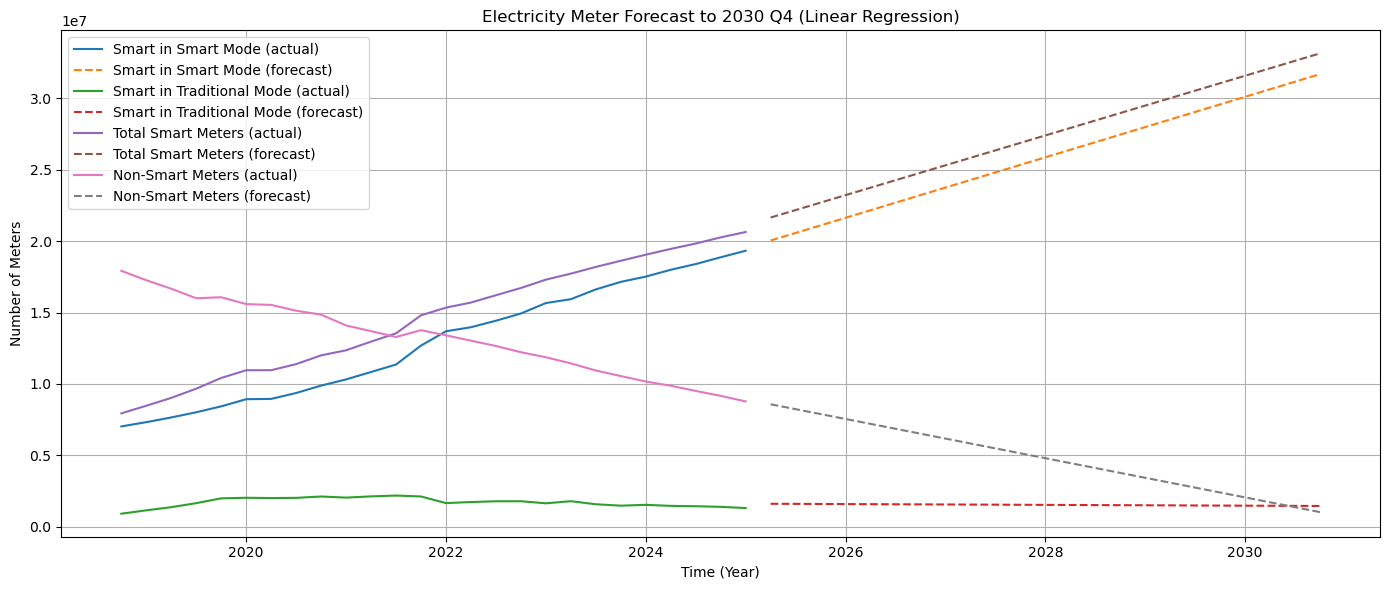

In [18]:
quarter_map = {'Q1': 0.0, 'Q2': 0.25, 'Q3': 0.5, 'Q4': 0.75}
Smart_Metres_Number_of_dwelings_sorted['Time'] = (
    Smart_Metres_Number_of_dwelings_sorted['Year'] + Smart_Metres_Number_of_dwelings_sorted['Quarter'].map(quarter_map)
)

future_years = []
future_labels = []
year = Smart_Metres_Number_of_dwelings_sorted['Year'].max()
quarter = Smart_Metres_Number_of_dwelings_sorted['Quarter'].iloc[-1]

q_index = list(quarter_map.keys()).index(quarter)
current_year = Smart_Metres_Number_of_dwelings_sorted['Year'].iloc[-1]
current_q = quarter_map[quarter]

future_times = []
future_labels = []

current_time = current_year + current_q + 0.25
end_time = 2030.75

while current_time <= end_time:
    y = int(current_time)
    q = list(quarter_map.values()).index(round(current_time % 1, 2))
    label = f"{y} Q{q + 1}"
    future_labels.append(label)
    future_times.append(current_time)
    current_time += 0.25

future_times = np.array(future_times).reshape(-1, 1)

plt.figure(figsize=(14, 6))

for column in ['Smart in Smart Mode', 'Smart in Traditional Mode', 'Total Smart Meters', 'Non-Smart Meters']:
    X = Smart_Metres_Number_of_dwelings_sorted['Time'].values.reshape(-1, 1)
    y = Smart_Metres_Number_of_dwelings_sorted[column].values

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(future_times)

    plt.plot(Smart_Metres_Number_of_dwelings_sorted['Time'], y, label=f'{column} (actual)')

    plt.plot(future_times, predictions, '--', label=f'{column} (forecast)')

plt.xlabel("Time (Year)")
plt.ylabel("Number of Meters")
plt.title("Electricity Meter Forecast to 2030 Q4 (Linear Regression)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [39]:
forecast_dict = {
    'Time': future_times.flatten(),
    'Label': future_labels
}

for column in ['Smart in Smart Mode', 'Smart in Traditional Mode', 'Total Smart Meters', 'Non-Smart Meters']:
    X = Smart_Metres_Number_of_dwelings_sorted['Time'].values.reshape(-1, 1)
    y = Smart_Metres_Number_of_dwelings_sorted[column].values

    model = LinearRegression()
    model.fit(X, y)

    predictions = model.predict(future_times)
    forecast_dict[column] = predictions

forecast_df = pd.DataFrame(forecast_dict)
forecast_df["Type"] = "Forecast"

historical_df = Smart_Metres_Number_of_dwelings_sorted.copy()
historical_df["Type"] = "Historical"

cols_order = ['Time', 'Label', 'Smart in Smart Mode', 'Smart in Traditional Mode',
              'Total Smart Meters', 'Non-Smart Meters', 'Type']

combined_df = pd.concat([historical_df, forecast_df], ignore_index=True)[cols_order]
combined_df.to_csv("electricity_meter_forecast_to_2030Q4.csv", index=False)